<h1>Linear Algebra (CpE210A)

<h3>Midterms Project

Coded and submitted by:<br>
<i>Escobar, Angela Shanine G.<br>
   201812026 <br>
   58010 </i>

Directions
This Jupyter Notebook will serve as your base code for your Midterm Project. You must further format and provide complete discussion on the given topic. 
- Provide all necessary explanations for specific code blocks. 
- Provide illustrations for key results.
- Observe clean code (intuitive variable names, proper commenting, proper code spacing)
- Provide a summary discussion at the end

Failure to use this format or failure to update the document will be given a deduction equivalent to 50% of the original score. 

### Case

Bebang is back to consult you about her business. Furthering her data analytics initiative she asks you for help to compute some relevant data. Now she is asking you to compute and visualize her sales and costs for the past year. She has given you the datasets attached to her request.

### Problem

State and explain Bebang's problem here and provide the deliverables.

# Proof of Concept

Now that you have a grasp on the requirements we need to start with making a program to prove that her problem is solvable. As a Linear Algebra student, we will be focusin on applying vector operations to meet her needs. First, we need to import her data. We will use the `pandas` library for this. For more information you can look into their documentation [here](https://pandas.pydata.org/).

In [5]:
import pandas as pd

file_prices = "bebang prices.csv"
file_sales = "bebang sales.csv"

df_prices = pd.read_csv(file_prices, index_col=0)
df_sales = pd.read_csv(file_sales)


## Let's check what's in df_prices
df_prices

,red velvet,oreo,sugar glazed,almond honey,matcha,strawberry cream,brown sugar boba,furits and nuts,dark chocolate,chocolate and orange,choco mint,choco butter naught
price per piece,35,25,20,35,50,40,40,45,30,40,45,45
cost per piece,25,15,10,20,35,31,30,25,15,25,32,31


In [6]:
## Let's check the sales dataframe
df_sales

,flavor,january,february,march,april,may,june,july,august,september,october,november,december
0,red velvet,781,524,364,157,894,56,89,41,23,78,231,899
1,oreo,210,324,344,32,123,1,3,0,1,6,312,548
2,sugar glazed,599,674,854,14,467,78,36,48,75,98,781,1602
3,almond honey,124,112,114,23,198,12,32,41,23,36,300,566
4,matcha,645,498,885,98,177,98,43,96,26,71,549,897
5,strawberry cream,210,372,369,78,163,26,45,22,54,41,207,456
6,brown sugar boba,981,380,154,14,147,15,98,33,23,36,552,633
7,furits and nuts,478,462,354,49,89,0,1,0,1,8,335,214
8,dark chocolate,598,203,36,96,789,4,5,0,8,0,789,458
9,chocolate and orange,324,123,48,32,65,74,78,45,89,100,632,231


## Part 1: Monthly Sales

In [17]:
import numpy as np
### Vectorizing the data
sales_mat = np.array(df_sales.set_index('flavor'))
prices_mat = np.array(df_prices)[0].reshape(12,1)## reshape this vector to the appropriate size
costs_mat = np.array(df_prices)[1].reshape(12,1) ## reshape this vector to the appropriate size
#.reshape will reshape its arrays according to its parameter

## Do not alter these lines
print(sales_mat.shape)
print(prices_mat.shape)
print(costs_mat.shape)
# Expected Output
# (12, 12)
# (12, 1)
# (12, 1)

(12, 12)
(12, 1)
(12, 1)


#### Formulas

Take note that the fomula for revenue is: <br>
$revenue = sales * price $ <br>
In this case, think that revenue, sales, and price are vectors instead of individual values <br>
The formula of cost per item sold is: <br>
$cost_{sold} = sales * cost$ <br>
The formula for profit is: <br>
$profit = revenue - cost_{sold}$ <br>
Solving for the monthly profit will be the sum of all profits made on that month.

In [137]:
#Create a function that *returns* and prints the monthly sales and profit for each month 
def monthly_sales(price, cost, sales):
    monthly_revenue = np.dot(np.transpose(prices_mat),sales_mat)## YOUR CODE HERE
    monthly_costs =np.dot(np.transpose(costs_mat),sales_mat) ## YOUR CODE HERE
    monthly_profits = monthly_revenue - monthly_costs ## YOUR CODE HERE  
    return monthly_revenue.flatten(), monthly_costs.flatten(), monthly_profits.flatten()

In [138]:
### Do not alter this cell
month_rev, month_cost, month_profit = monthly_sales(prices_mat, costs_mat, sales_mat)
### print the values
print(f'Monthly Revenue: \n {month_rev}')
print(f'Monthly Cost: \n {month_cost}')
print(f'Monthly profit: \n {month_profit}')

Monthly Revenue: 
 [236825 175530 159045  30335 150085  16735  17970  16995  14960  21590
 213655 347365]
Monthly Cost: 
 [157454 116322 105195  20334  97261  11208  12372  11497   9926  14377
 137107 230209]
Monthly profit: 
 [ 79371  59208  53850  10001  52824   5527   5598   5498   5034   7213
  76548 117156]


## Part 2: Flavor Sales

In [151]:
#Create a function that *returns* and prints the flavor profits for the whole year 
def flavor_sales(price, cost, sales): 
    flavor_revenue = np.array([
                            sum((sales_mat[0,:])*(prices_mat[0,0])),    ### Computation for the flavor_revenue where the sales of each flavor 
                            sum((sales_mat[1,:])*(prices_mat[1,0])),     ### are multiplied by the price of each piece
                            sum((sales_mat[2,:])*(prices_mat[2,0])),
                            sum((sales_mat[3,:])*(prices_mat[3,0])),
                            sum((sales_mat[4,:])*(prices_mat[4,0])),
                            sum((sales_mat[5,:])*(prices_mat[5,0])),
                            sum((sales_mat[6,:])*(prices_mat[6,0])),
                            sum((sales_mat[7,:])*(prices_mat[7,0])),
                            sum((sales_mat[8,:])*(prices_mat[8,0])),
                            sum((sales_mat[9,:])*(prices_mat[9,0])),
                            sum((sales_mat[10,:])*(prices_mat[10,0])),
                            sum((sales_mat[11,:])*(prices_mat[11,0]))
    ])
                                                
    flavor_costs = np.array([sum((sales_mat[0,:])*(costs_mat[0,0])), ### Computation for the flavor_costs that the sales of each flavor is 
                            sum((sales_mat[1,:])*(costs_mat[1,0])),    ## multiplied by each costs per piece
                            sum((sales_mat[2,:])*(costs_mat[2,0])),
                            sum((sales_mat[3,:])*(costs_mat[3,0])),
                            sum((sales_mat[4,:])*(costs_mat[4,0])),
                            sum((sales_mat[5,:])*(costs_mat[5,0])),
                            sum((sales_mat[6,:])*(costs_mat[6,0])),
                            sum((sales_mat[7,:])*(costs_mat[7,0])),
                            sum((sales_mat[8,:])*(costs_mat[8,0])),
                            sum((sales_mat[9,:])*(costs_mat[9,0])),
                            sum((sales_mat[10,:])*(costs_mat[10,0])),
                            sum((sales_mat[11,:])*(costs_mat[11,0]))
                                ])
    flavor_profits =flavor_revenue -  flavor_costs
    return flavor_profits.flatten()

In [152]:
### Do not alter this cell
flavor_profit = flavor_sales(prices_mat, costs_mat, sales_mat)
### print the values
print(f' Profits of flavors:\n{flavor_profit}')

 Profits of flavors:
[41370 19040 53260 23715 61245 18387 30660 39820 44790 27615 26156 91770]


In [179]:
### identify the best-selling and least-selling flavors. You can use np.sort() or np.argmax() for this.
flavors=["red velvet","oreo","sugar glazed","almond honey","matcha","strawberry cream","brown sugar boba",
         "furits and nuts","dark chocolate","chocolate and orange","choco mint","choco butter naught"]

best_3_flavors = sorted(zip(flavor_profit,flavors),reverse = True)[0:3] ## This would sort out the best flavor base on their profit
print("The best 3 flavors are :", best_3_flavors)
worst_3_flavors = sorted(zip(flavor_profit,flavors))[0:3] ## This would sort out the worst flavor base on their profit
print("The 3 worst flavors are:", worst_3_flavors)

The best 3 flavors are : [(91770, 'choco butter naught'), (61245, 'matcha'), (53260, 'sugar glazed')]
The 3 worst flavors are: [(18387, 'strawberry cream'), (19040, 'oreo'), (23715, 'almond honey')]


## Part 3: Visualizing the Data (Optional for +40%)
You can try to visualize the data in the most comprehensible chart that you can use.

In [85]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

%matplotlib inline

#### Entire Dataset

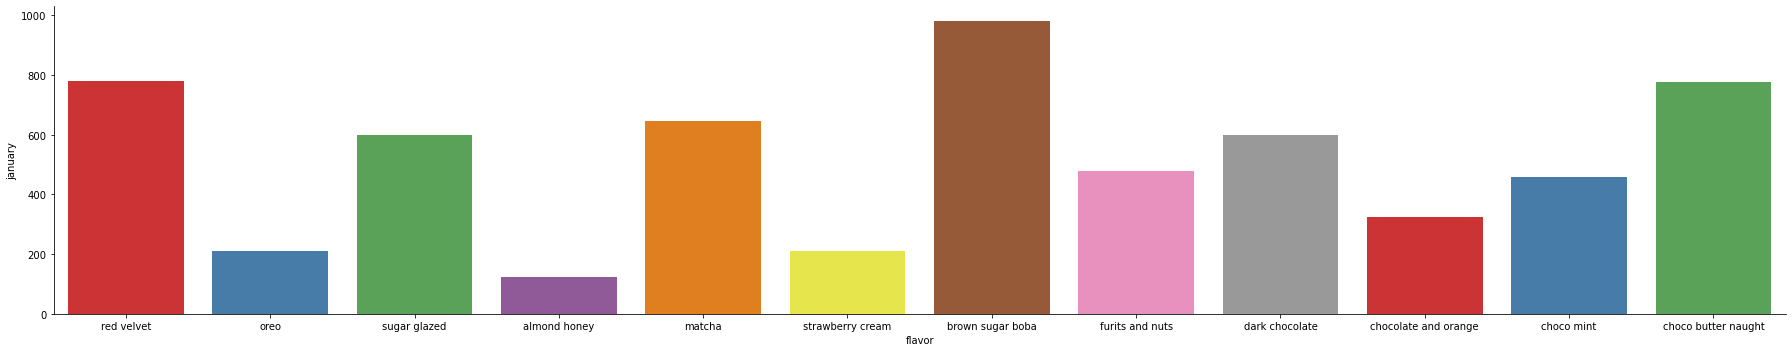

In [128]:
sns.catplot(x='flavor',y ="january",
                data = df_sales, palette = 'Set1', kind ="bar",
                height = 5, aspect = 5);

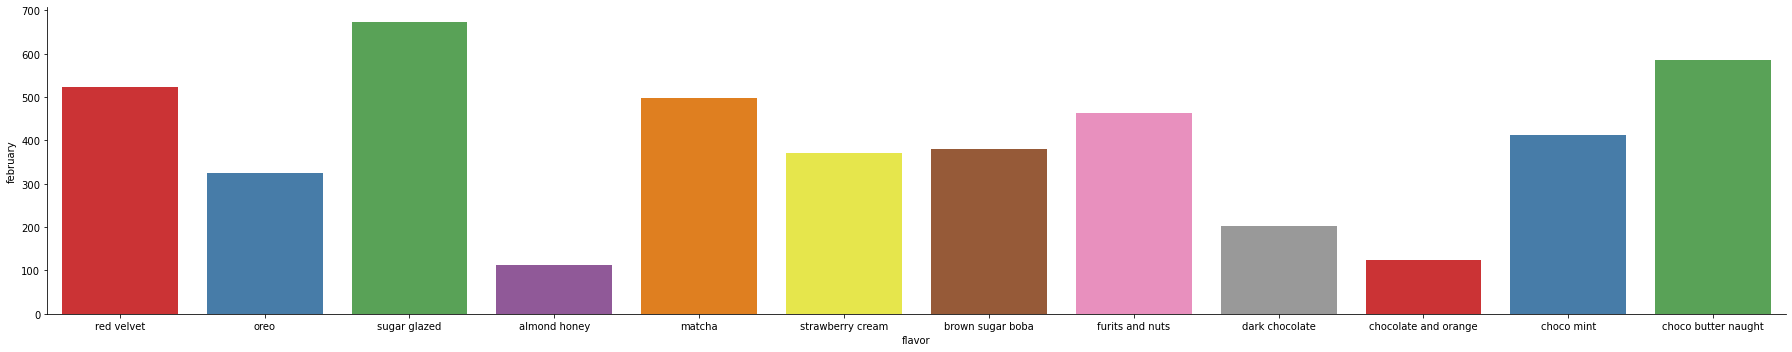

In [129]:
sns.catplot(x='flavor',y ="february",
                data = df_sales, palette = 'Set1', kind ="bar",
                height = 5, aspect = 5);

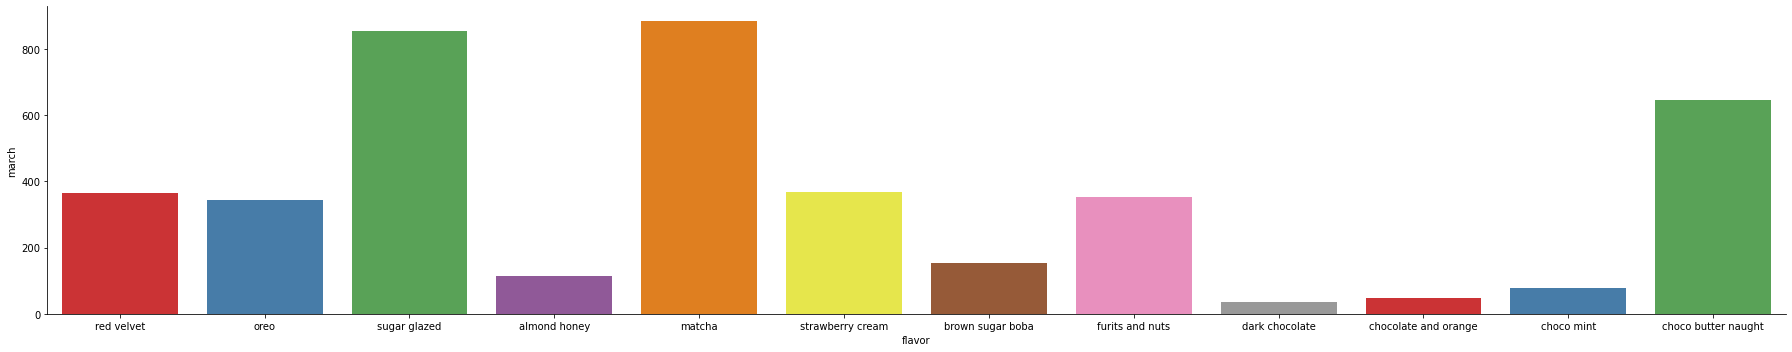

In [130]:
sns.catplot(x='flavor',y ="march",
                data = df_sales, palette = 'Set1', kind ="bar",
                height = 5, aspect = 5);

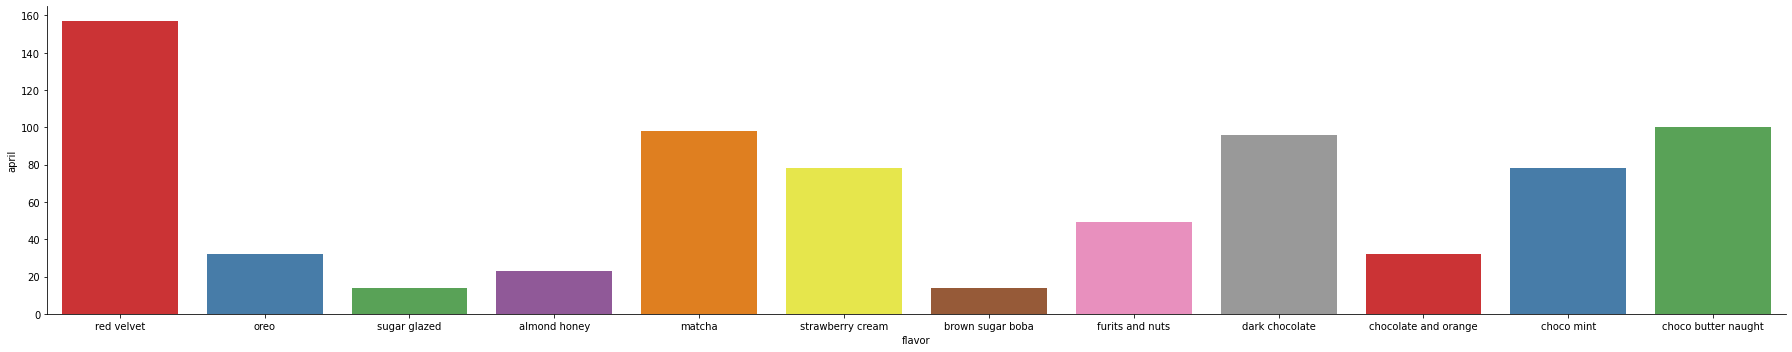

In [107]:
sns.catplot(x='flavor',y ="april",
                data = df_sales, palette = 'Set1', kind ="bar",
                height = 5, aspect = 5);

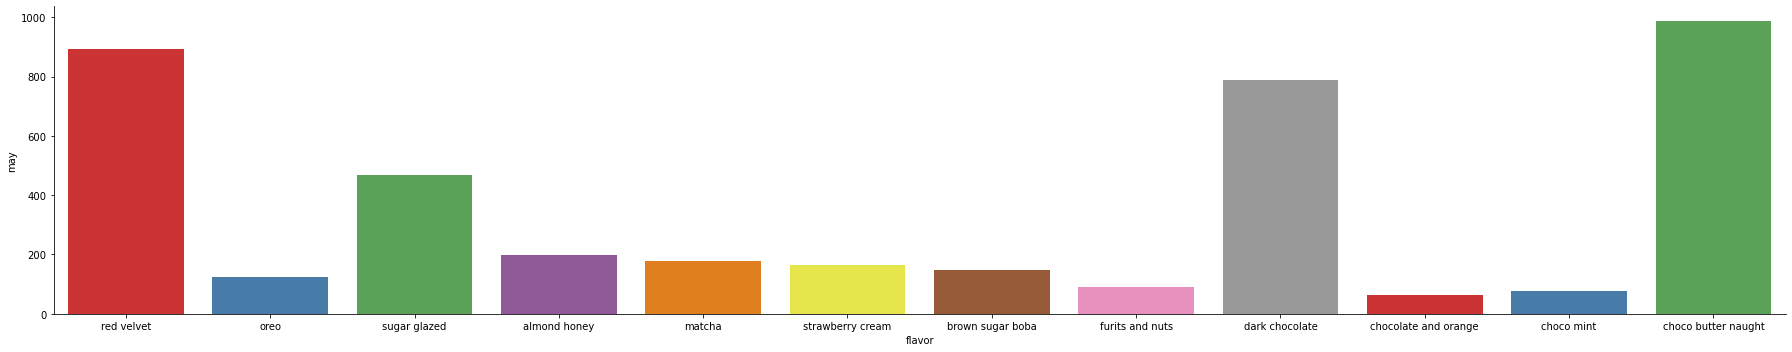

In [108]:
sns.catplot(x='flavor',y ="may",
                data = df_sales, palette = 'Set1', kind ="bar",
                height = 5, aspect = 5);

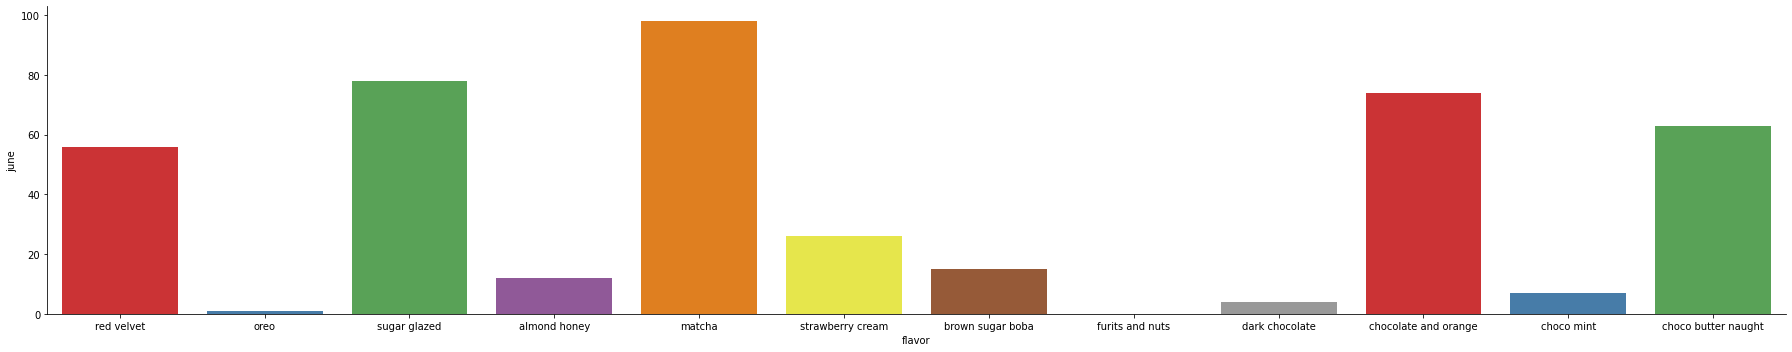

In [109]:
sns.catplot(x='flavor',y ="june",
                data = df_sales, palette = 'Set1', kind ="bar",
                height = 5, aspect = 5);

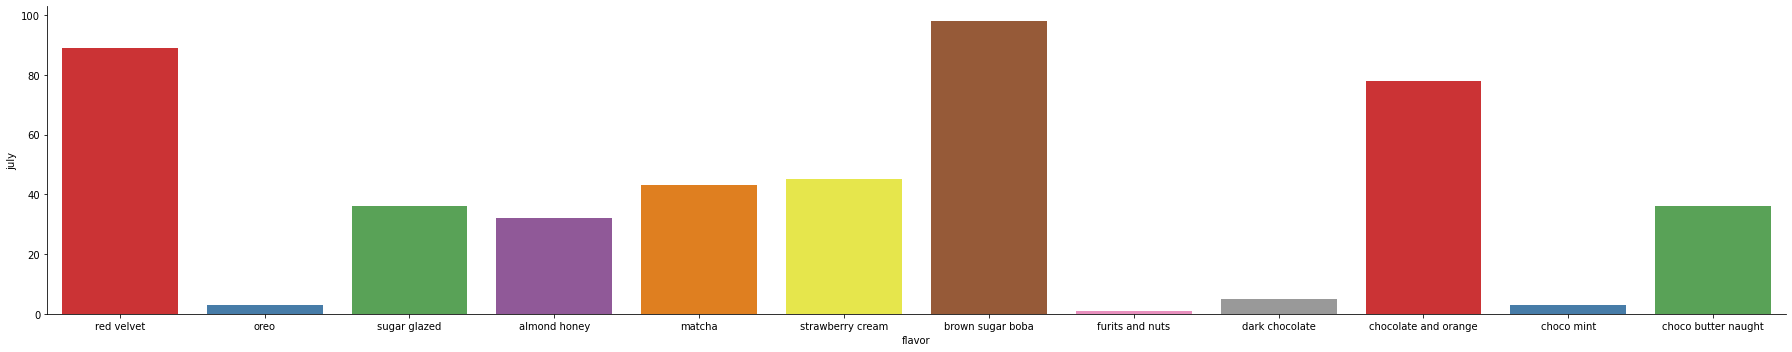

In [110]:
sns.catplot(x='flavor',y ="july",
                data = df_sales, palette = 'Set1', kind ="bar",
                height = 5, aspect = 5);

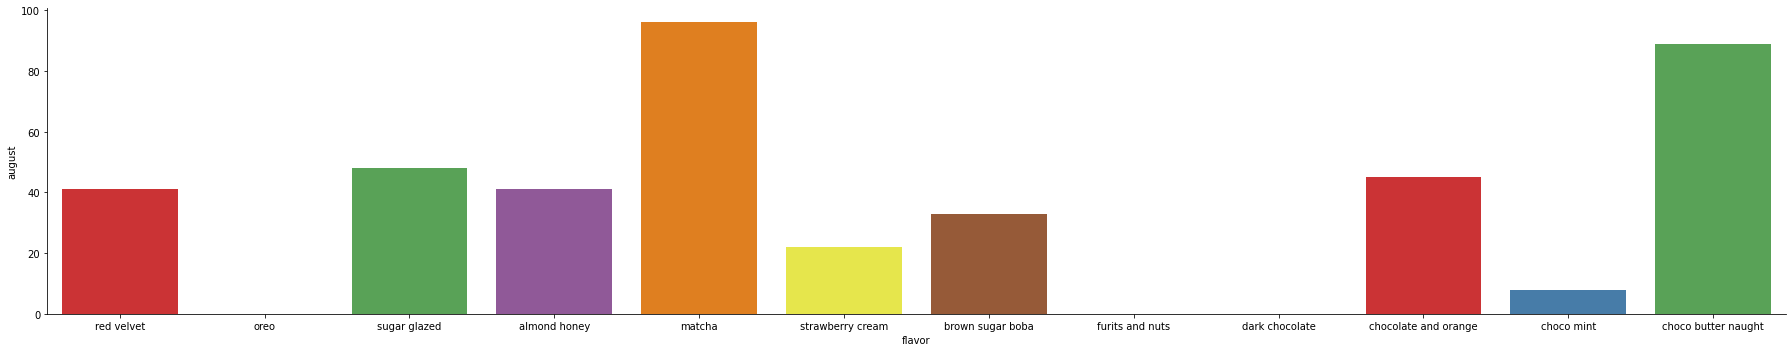

In [111]:
sns.catplot(x='flavor',y ="august",
                data = df_sales, palette = 'Set1', kind ="bar",
                height = 5, aspect = 5);

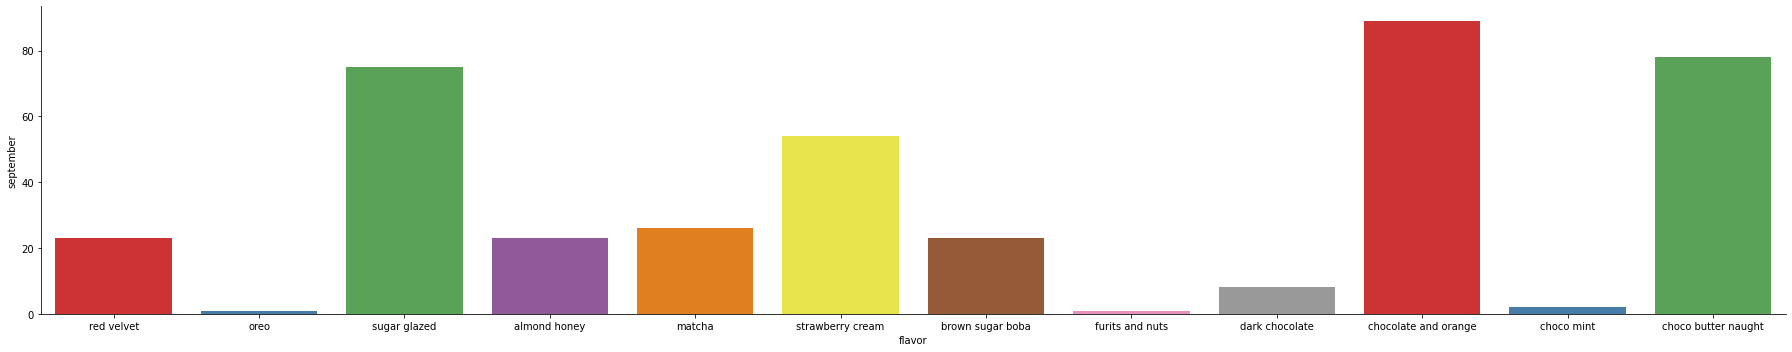

In [112]:
sns.catplot(x='flavor',y ="september",
                data = df_sales, palette = 'Set1', kind ="bar",
                height = 5, aspect = 5);

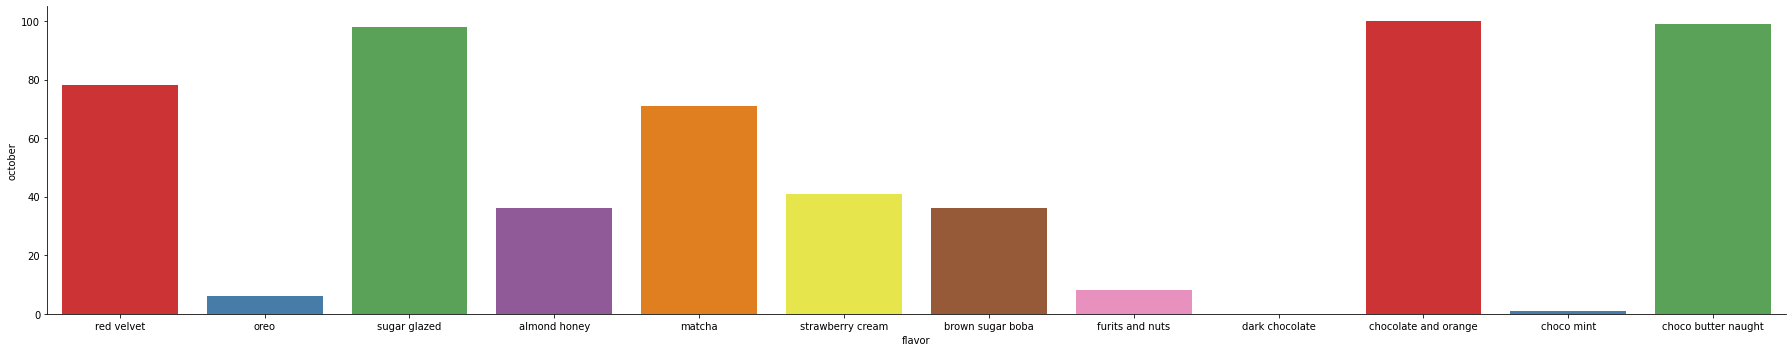

In [113]:
sns.catplot(x='flavor',y ="october",
                data = df_sales, palette = 'Set1', kind ="bar",
                height = 5, aspect = 5);

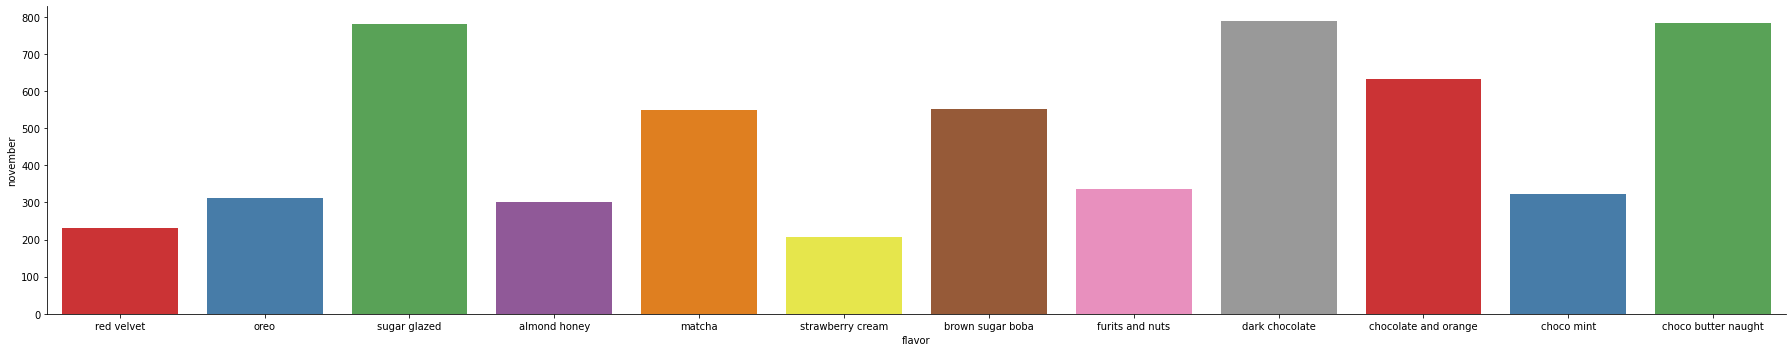

In [114]:
sns.catplot(x='flavor',y ="november",
                data = df_sales, palette = 'Set1', kind ="bar",
                height = 5, aspect = 5);

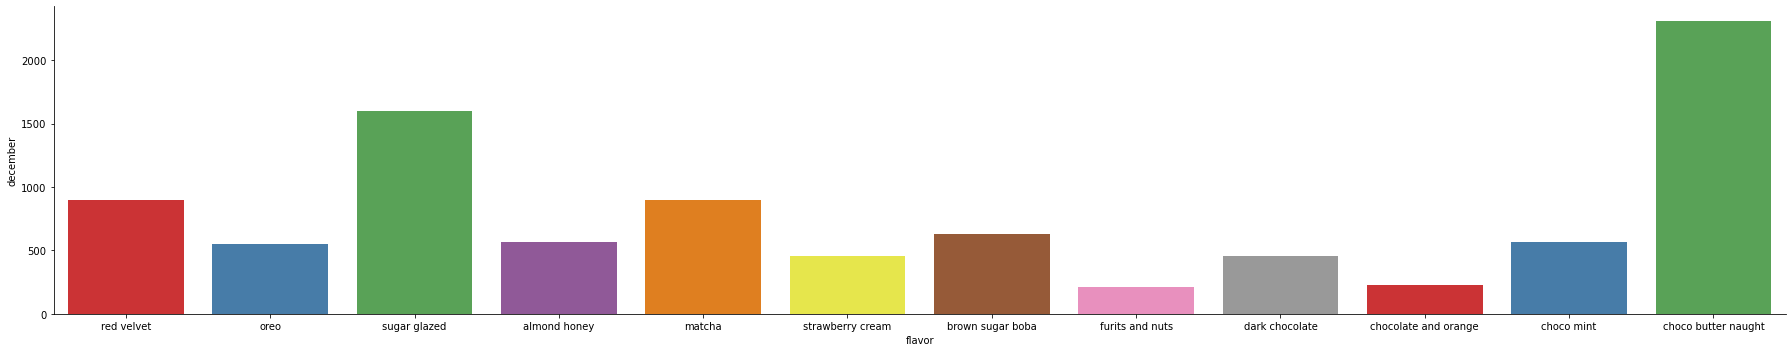

In [115]:
sns.catplot(x='flavor',y ="december",
                data = df_sales, palette = 'Set1', kind ="bar",
                height = 5, aspect = 5);

#### Monthly Sales

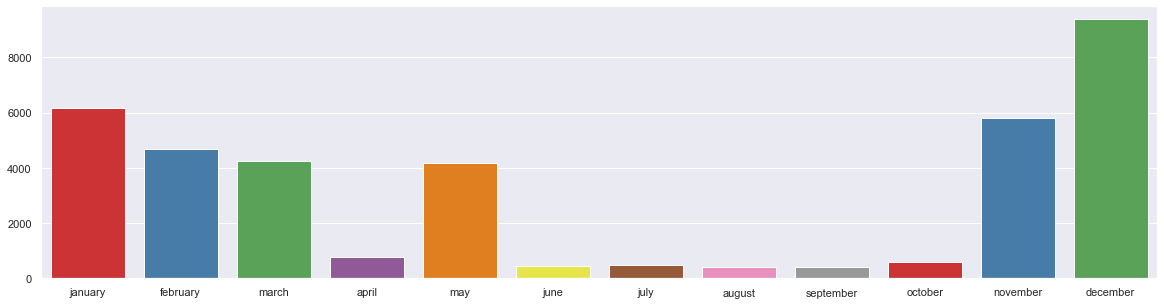

In [187]:
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot("month","sales", data=monthly_sale,palette='Set1')

#### Flavor Sales

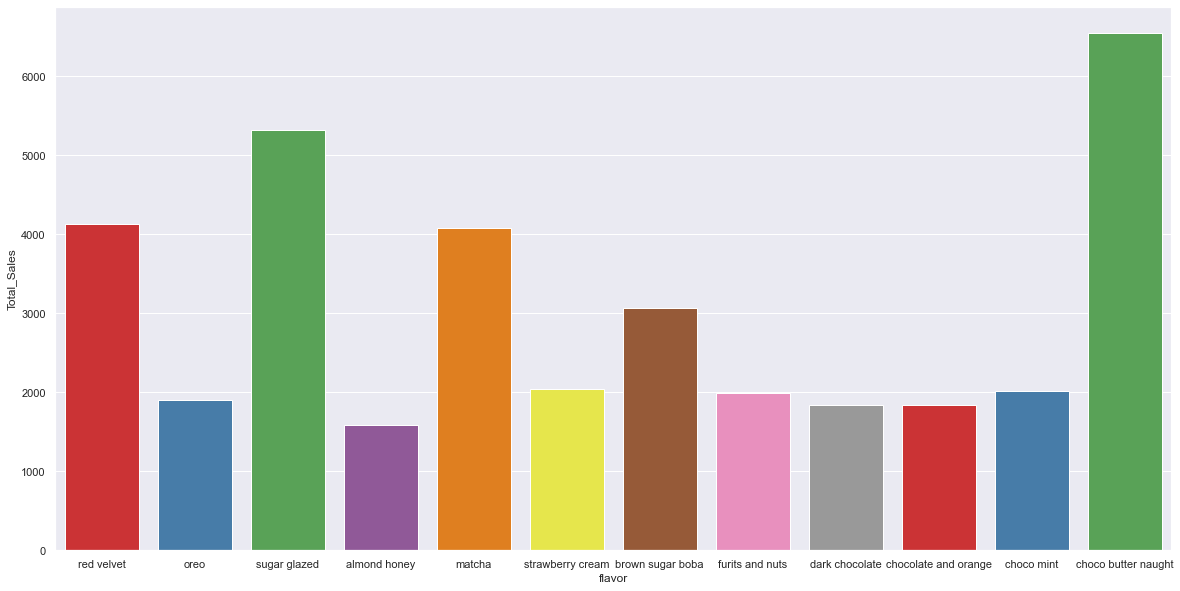

In [183]:
sns.set(rc={'figure.figsize':(20,10)})
sns.barplot("flavor","Total_Sales",data=df_sales,palette='Set1')

## Part 4: Business Recommendation and Conclusion
Present the findings of your data analysis and provide recommendations

As you can see on the calculation above the some of her products are least profitable and some are the best. To be honest, her business are not stable because of her cost in each year are greater than the profit that her company getting. In the month of April,June, July, August, September, and October she was having a hard time to sell his products. I recommend for the business of Beba Ng is to improve her strategy in the month of where she was struggling to have income because this is the months that her products are like off season unlike on the other months. I also recommend that whenever someone buys her product a doscen of donuts she should give a free one donut so that the costumers would buy to her store. During the off season what bebang can do is to have a % off becuase many people are so attracted to % off so that it can attract many customers. The least profitable products should improve the flavor or have a survey about the product and if the most of the customers still didn't like the flavor then it is the best if it is removed to the menu. I hope that my recommendation would help your business to grow.